In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

tf.enable_eager_execution()
tf.set_random_seed(230)
print(tf.__version__)

from matplotlib import pyplot as plt

import time
import sys
sys.path.append('..')

/Documents/venv3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.13.1


## Load Hyperparameters

In [8]:
from configs.rnn_biogas import hparams
hparams = hparams()
hparams.learning_rate = 0.001
hparams.units = 32
hparams.target['fields'] = hparams.inp['fields']
vars(hparams)

{'inp': {'fields': [{'name': 'AT305', 'embedding': 1, 'normalise': 2},
   {'name': 'AT303', 'embedding': 1, 'normalise': 2}],
  'start': 0,
  'stop': 9999,
  'length': 120,
  'stride': 1,
  'dim': 5},
 'target': {'fields': [{'name': 'AT305', 'embedding': 1, 'normalise': 2},
   {'name': 'AT303', 'embedding': 1, 'normalise': 2}],
  'start': 120,
  'stop': 10024,
  'length': 24,
  'stride': 1,
  'dim': 1},
 'cond': {'fields': [{'name': 'AT305', 'embedding': 1, 'normalise': 2}],
  'start': 120,
  'stop': 10024,
  'length': 24,
  'stride': 1,
  'dim': 1},
 'batch_size': 800,
 'datagen': 'biogas',
 'lambd': 1e-06,
 'learning_rate': 0.001,
 'logs_path': '/tmp/tensorflow_logs',
 'lr_decay': 0.999,
 'units': 32,
 'norm_epsilon': 1e-12,
 'num_layers': 1,
 'dropout_rate': 0.2,
 'test_split': 0.1,
 'train_split': 0.8,
 'val_split': 0.1}

## Load Data Generator

In [11]:
from data_loader.biogas import load_data
train, val, test = load_data(hparams)
inp, inp_max, inp_min, target, target_max, target_min, cond = next(iter(train))

## Define Model

In [4]:
from models.birnn import BiRNN
from trainers.birnn_trainer import train_model

## Train Model

In [18]:
model = BiRNN(hparams)
hparams.learning_rate = 0.001
optimizer = tf.train.AdamOptimizer(learning_rate = hparams.learning_rate)

In [21]:
train_model(model, train, optimizer, hparams)

0 :  0.01243 [0.0078  0.00944 0.00013]
1 :  0.01545 [0.01097 0.01139 0.00013]
2 :  0.01198 [0.00773 0.00921 0.00013]
3 :  0.01506 [0.0109  0.01082 0.00013]
4 :  0.0115 [0.00729 0.00871 0.00013]
5 :  0.01574 [0.01136 0.01116 0.00013]
6 :  0.01131 [0.00767 0.00868 0.00013]
7 :  0.01444 [0.01048 0.01042 0.00013]
8 :  0.01112 [0.00744 0.00861 0.00013]
9 :  0.0142 [0.01046 0.01038 0.00013]


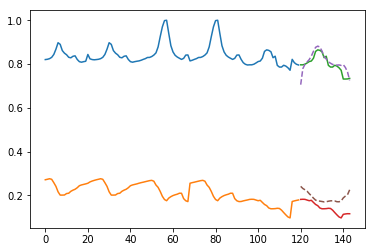

In [22]:
TARGET = 100

model.training = False
pred = model(inp, None)
model.training = True

plt.figure()
plt.plot(range(120), np.reshape(np.transpose(inp[TARGET,:,:5]), (-1)))
plt.plot(range(120), np.reshape(np.transpose(inp[TARGET,:,5:]), (-1)))

plt.plot(range(120, 144), np.array(target)[TARGET])
plt.plot(range(120, 144), np.array(pred[0])[TARGET], '--')
plt.plot(range(120, 144), np.array(pred[1])[TARGET], '--')
plt.show()

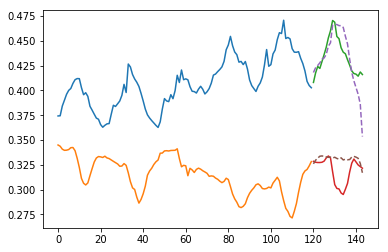

In [114]:
TARGET = 200

model.training = False
pred = model(inp, None)
model.training = True

plt.figure()
plt.plot(range(120), np.reshape(np.transpose(inp[TARGET,:,:5]), (-1)))
plt.plot(range(120), np.reshape(np.transpose(inp[TARGET,:,5:]), (-1)))

plt.plot(range(120, 144), np.array(target)[TARGET])
plt.plot(range(120, 144), np.array(pred)[TARGET], '--')
plt.show()

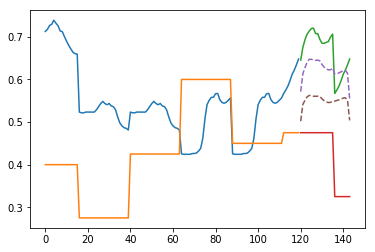

In [9]:
TARGET = 400

model.training = False
pred = model(inp, None)
model.training = True

plt.figure()
plt.plot(range(120), np.reshape(np.transpose(inp[TARGET,:,:5]), (-1)))
plt.plot(range(120), target[TARGET-120:TARGET,0,1])

plt.plot(range(120, 144), np.array(target)[TARGET])
plt.plot(range(120, 144), np.array(pred[0])[TARGET], '--')
plt.plot(range(120, 144), np.array(pred[1])[TARGET], '--')
plt.show()